# Investigate supervised learning algorithms for article classification on BBC news datasets

This report investigates supervised learning algorithms for article classification using LR, NB, SVM, NNs on BBC news datasets.
I start from exploratory data analytics on text data (Task1). Subsequently, 4 classification models (LR, NB, SVM, NNs) are learnt by implementing a tunable strategy to observe the impact on training dataset accordingly (Task2). Lastly, classification quality is evaluated to explore the relatively optimal models (Task3).  

## TASK1: Exploratory Data Analytics
### (a) Load the dataset and construct a feature vector for each article in the BBC news. Report the number of articles, and the number of extracted features

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read input datasets
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df = pd.concat([df_train,df_test])
array = np.array(df.Text).tolist()

# vectorize the array
vectorizer = TfidfVectorizer()
data1 = vectorizer.fit(array)
data = data1.transform(array)

print(f'Number of articles in training dataset:\n {data.shape[0]}')
print(f'\nNumber of extracted features in training dataset:\n {data.shape[1]}')

Number of articles in training dataset:
 534

Number of extracted features in training dataset:
 14927


## Show 5 example articles with their extracted features using a dataframe.

In [3]:
# extract feature values of the 5 examples 
pd.DataFrame(data.toarray()[:5])

,0,1,2,3,4,5,6,7,8,9,...,14917,14918,14919,14920,14921,14922,14923,14924,14925,14926
0,0.0,0.020253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056233,0.0,0.0


In [4]:
# extract feature and corresponding feature values of the 5 examples 
example_5 = data.toarray()[:5]
example_dict = []
for n in range(len(example_5)):
    dt = example_5[n]
    example_list = []
    for i in range(len(dt)):
        if dt[i] > 0:
            example_list.append((list(data1.vocabulary_.keys())[i],round(dt[i],4)))
    example_dict.append(example_list)
pd.DataFrame(example_dict)

,0,1,2,3,4,5,6,7,8,9,...,341,342,343,344,345,346,347,348,349,350
0,"(governs, 0.0203)","(bbc, 0.0686)","(exactly, 0.0544)","(mr, 0.033)","(express, 0.0408)","(paul, 0.0392)","(bigger, 0.0249)","(ireland, 0.0276)","(aim, 0.0421)","(movements, 0.0551)",...,None,None,None,None,None,None,None,None,None,None
1,"(exactly, 0.0485)","(actress, 0.2253)","(old, 0.0232)","(tour, 0.066)","(historical, 0.081)","(generated, 0.0667)","(spend, 0.047)","(refuses, 0.0751)","(comments, 0.0564)","(opinions, 0.0908)",...,None,None,None,None,None,None,None,None,None,None
2,"(using, 0.1233)","(bjorn, 0.0893)","(popular, 0.0893)","(gradually, 0.0568)","(seen, 0.1205)","(exactly, 0.0413)","(wednesday, 0.0588)","(explored, 0.0494)","(honoured, 0.1222)","(occupies, 0.0675)",...,None,None,None,None,None,None,None,None,None,None
3,"(shows, 0.0567)","(using, 0.0525)","(used, 0.052)","(almost, 0.063)","(replacing, 0.0869)","(analogue, 0.0508)","(fame, 0.071)","(tracks, 0.076)","(assaulted, 0.0816)","(recording, 0.0923)",...,None,None,None,None,None,None,None,None,None,None
4,"(pushing, 0.0214)","(using, 0.0259)","(senior, 0.0469)","(camera, 0.0366)","(imply, 0.0503)","(innovation, 0.0455)","(flop, 0.0434)","(month, 0.0425)","(figure, 0.0455)","(europe, 0.0425)",...,"(untouchables, 0.0309)","(outnumbered, 0.0323)","(stadiums, 0.0562)","(sincerest, 0.0261)","(slowing, 0.0739)","(suprnova, 0.0135)","(novastream, 0.0562)","(swarm, 0.0376)","(housemate, 0.0562)","(reviewing, 0.0562)"


## (b) Conduct term frequency analysis and report three plots: 
    (i) top-50 term frequency distribution across the entire dataset,     
    (ii) term frequency distribution for respective class of articles, and 
    (iii) class distribution. 

In [5]:
# split the dataframe into two dataframes: tech dataframe, enter dataframe
df = df_train.append(df_test,ignore_index=True)
df1 = df.drop(columns = "ArticleId").to_numpy()
new_list = []
for article in df1:
    word_list = article[0].strip().split(" ")
    category = article[1]
    temp = []
    for word in word_list:
        temp.append((word,category))
    new_list.extend(temp)
new_df = pd.DataFrame(new_list,columns=["Text","Category"])
tech_df = new_df[new_df["Category"] == "tech"]
entertainment_df = new_df[new_df["Category"] == "entertainment"]

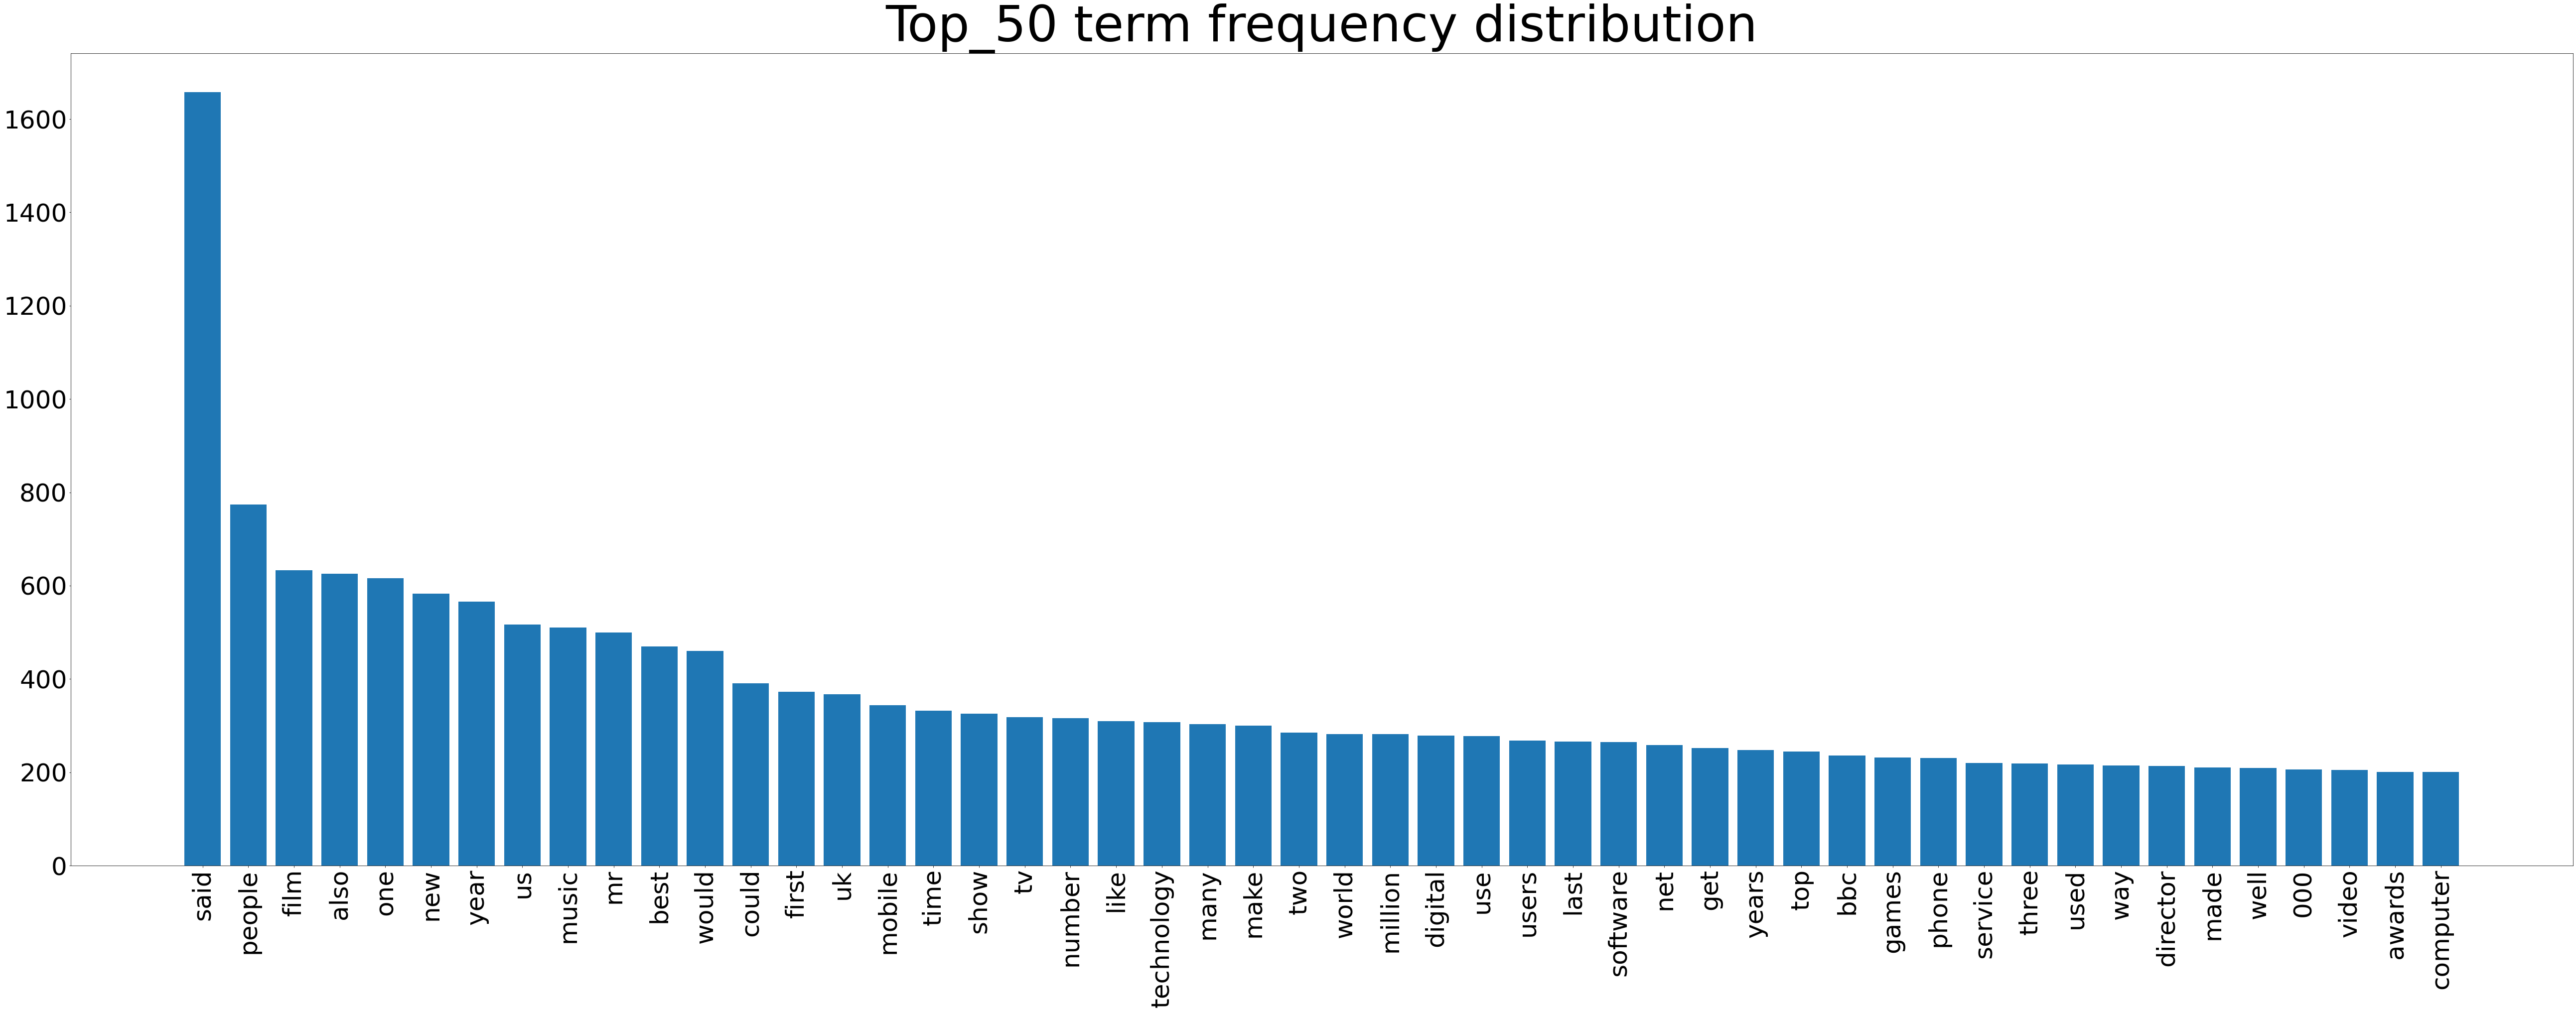

In [6]:
# (i) top-50 term frequency distribution across the entire dataset
top_50 = Counter(new_df['Text']).most_common(50)
top_50_word = []
top_50_fre = []
for word in top_50:
    top_50_word.append(word[0])
    top_50_fre.append(word[1])

plt.figure(figsize=(90, 30))
plt.bar(top_50_word, top_50_fre)
plt.title('Top_50 term frequency distribution',fontsize=100)
plt.yticks(fontsize=50)
plt.xticks(fontsize=50,rotation=90)
plt.show()

# print("X-labels are:", top_50_word)

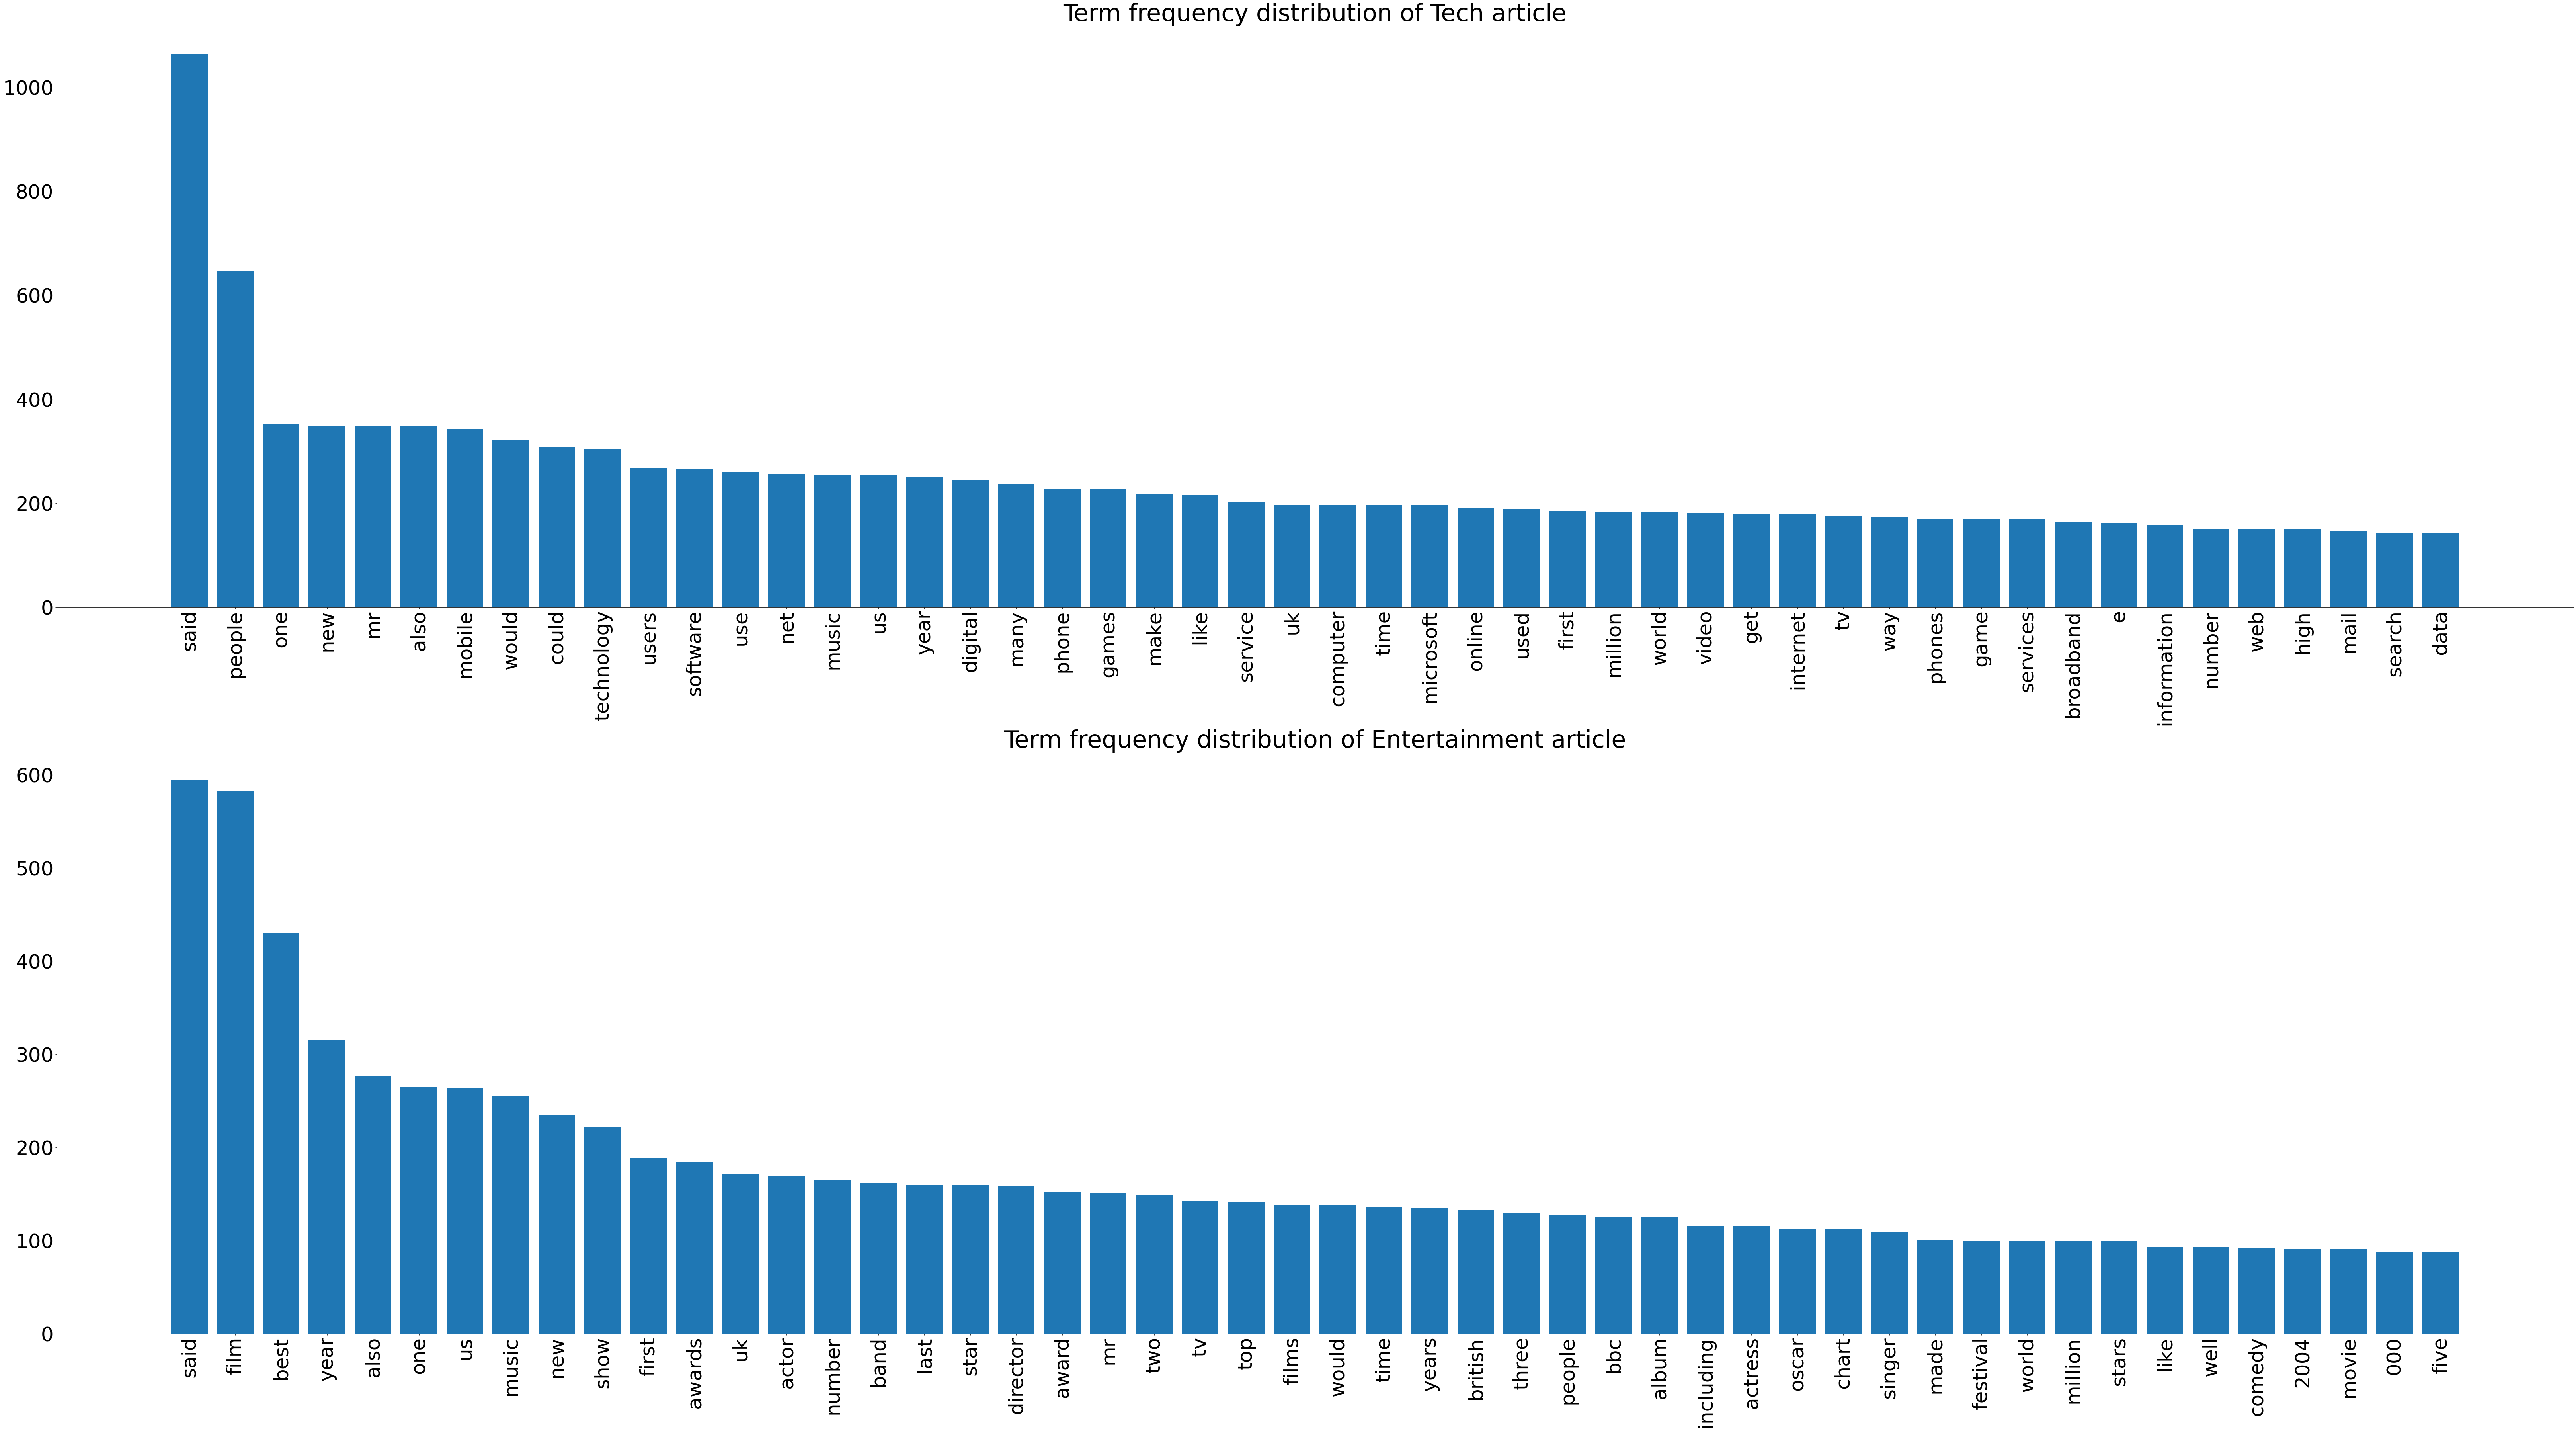

In [7]:
# (ii) term frequency distribution for respective class of articles
count_data_tech = Counter(tech_df['Text']).most_common(50)
word_tech = []
fre_tech = []
for word in count_data_tech:
    word_tech.append(word[0])
    fre_tech.append(word[1])

count_data_ent = Counter(entertainment_df['Text']).most_common(50)
word_ent = []
fre_ent = []
for word in count_data_ent:
    word_ent.append(word[0])
    fre_ent.append(word[1])

plt.figure(figsize=(90, 50))
plt.subplot(211)
plt.bar(word_tech, fre_tech)
plt.title('Term frequency distribution of Tech article',fontsize=60)
plt.yticks(fontsize=50)
plt.xticks(fontsize=50,rotation=90)

plt.subplot(212)
plt.bar(word_ent, fre_ent)
plt.title('Term frequency distribution of Entertainment article',fontsize=60)
plt.yticks(fontsize=50)
plt.xticks(fontsize=50,rotation=90)

plt.tight_layout()
plt.show()

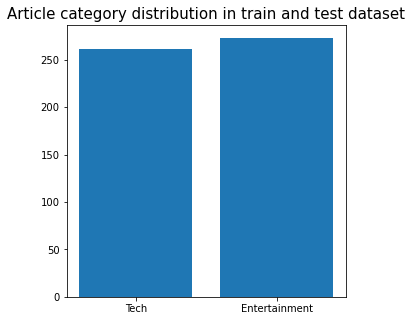

In [8]:
# (iii) class distribution
tech_df1 = df[df["Category"] == "tech"]
entertainment_df1 = df[df["Category"] == "entertainment"]

plt.figure(figsize=(5, 5))
plt.bar(["Tech","Entertainment"], [len(tech_df1),len(entertainment_df1)])
plt.title('Article category distribution in train and test dataset',fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

# TASK2: Classification Models Learning

## (a) Logistic Regression Classifier

In [9]:
import seaborn as sns 

from itertools import islice
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [10]:
# transforming the label, tech =1, entertainment = 0
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
target_names = ['tech', 'entertainment']
df_train["Category"] = np.where(df_train["Category"]=='tech',1, 0)
df_test["Category"] = np.where(df_test["Category"]=='tech',1, 0)

# extract features
vectorizer = TfidfVectorizer(max_features=1000)
data = vectorizer.fit(df_train['Text'])

X_train1 = data.transform(df_train['Text']).toarray()
X_test1 = data.transform(df_test['Text']).toarray()

Y_train1 = df_train["Category"]
Y_test1 = df_test["Category"]


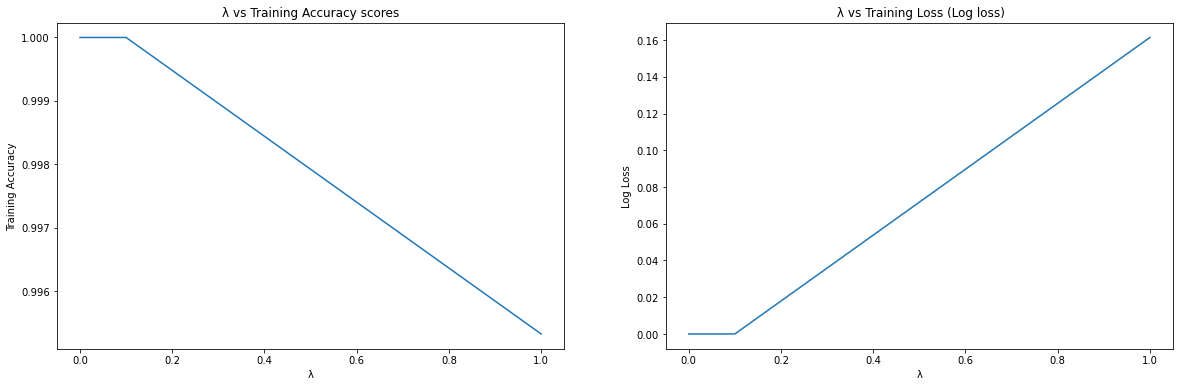

LogisticRegression Test Accuracy: 99.05660377358491 %


In [11]:
#l2 = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
l2 = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
accuracy_scores = []
logloss = []

# Considering different values of the regularization term λ and corresponding accuracy and log loss.
for i in l2:
    # In scikit learn, C is the inverse of λ. 
    lg_classifier = LogisticRegression(penalty="l2", C = 1/i)
    lg_classifier.fit(X_train1, Y_train1)
    score = lg_classifier.score(X_train1, Y_train1)
    accuracy_scores.append(score)
    Y_pred = lg_classifier.predict(X_train1)
    
    loss = log_loss(Y_train1, Y_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None)
    logloss.append(loss)
    
# plot different λ values and corresponding accuracy score.
plt.figure(figsize = (20, 6)) 
plt.subplot(121)
ax = plt.gca()
ax.plot(np.array(l2), np.array(accuracy_scores))
plt.xlabel("λ")
plt.ylabel("Training Accuracy")
plt.title("λ vs Training Accuracy scores")
plt.axis("tight")

# plot different λ values and corresponding log loss.
plt.subplot(122)
ax = plt.gca()
ax.plot(np.array(l2), np.array(logloss))
plt.xlabel("λ")
plt.ylabel("Log Loss")
plt.title(" λ vs Training Loss (Log loss)")
plt.axis("tight")

plt.show()

# setting L2 penalty = 0.1, C = 1/0.1 = 10
lg_classifier = LogisticRegression(penalty="l2", C = 10)
lg_classifier.fit(X_train1, Y_train1)
predictions = lg_classifier.predict(X_test1)
print("LogisticRegression Test Accuracy:", 100 * lg_classifier.score(X_test1, Y_test1), '%')


#### Describe the effect of the regularization parameter λ on the outcome in terms of bias and variance.

1000 top max_features are selected to fit this logistic regression classifier with L2-regularization. L2-regularization 
is applied to make sure that this classifier does not undergo overfitting problem.

If the regularization term λ = 0, it indicates that there is no regularization applied. Potential overfitting issue exists.
As the regularization term λ decreases, this classifier appears poor generalisation performance and has overfitting issue. 
It fits the training data so well with no training error and high training accuracy, so bias is low. But results change a lot 
if test set is applied, then test accuracy is low, so variance is high. In contrast, as the regularization term λ increases, 
it tends to add too much weight in the model, which leads to underfitting issue with low training accuracy (high training loss) 
so high bias and low variance.

## (b) Naive Bayes classifier

In [12]:
# transforming the label, tech =1, entertainment = 0
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
target_names = ['tech', 'entertainment']
df_train["Category"] = np.where(df_train["Category"]=='tech',1, 0)
df_test["Category"] = np.where(df_test["Category"]=='tech',1, 0)

# extract features
vectorizer = TfidfVectorizer()
data = vectorizer.fit(df_train['Text'])

X_train2 = data.transform(df_train['Text']).toarray()
X_test2 = data.transform(df_test['Text']).toarray()

Y_train2 = df_train["Category"]
Y_test2 = df_test["Category"]


nb_classifier = MultinomialNB(alpha=1)
nb_classifier.fit(X_train2, Y_train2)
predictions = nb_classifier.predict(X_test2)

print("MultinomialNB Accuracy:", 100 * sum(predictions == Y_test2) / len(predictions), '%')  

MultinomialNB Accuracy: 97.16981132075472 %


###  (i) top-20 most identifiable words that are most likely to occur in the articles over two classes

In [13]:
feature_array = np.array(data.get_feature_names())

tech_arr = []
enter_arr = []
for i in range(len(Y_train2)):
    if Y_train2[i] == 1:
        tech_arr.append(X_train2[i])
    else:
        enter_arr.append(X_train2[i])
tech_arr = np.array(tech_arr)
enter_arr = np.array(enter_arr)   

#tf-idf weights of total words belonging to tech class
weight_of_total_words_tech = tech_arr.sum()
#tf-idf weights of total words belonging to entertainment class
weight_of_total_words_enter = enter_arr.sum()
#tf-idf_weights of the word for all the documents belonging to that tech class
weight_of_words_tech_arr = tech_arr.sum(axis=0)
#tf-idf_weights of the word for all the documents belonging to that entertainment class
weight_of_words_enter_arr = enter_arr.sum(axis=0)

prob_of_words_tech_arr = weight_of_words_tech_arr/weight_of_total_words_tech
prob_of_words_enter_arr = weight_of_words_enter_arr/weight_of_total_words_enter

tech_dict = {}
enter_dict = {}

for j in range(len(prob_of_words_tech_arr)):
    tech_dict[feature_array[j]] = prob_of_words_tech_arr[j]
    enter_dict[feature_array[j]] = prob_of_words_enter_arr[j]

sorted_tech_dict = dict(sorted(tech_dict.items(), key=lambda item: -item[1]))
sorted_enter_dict = dict(sorted(enter_dict.items(), key=lambda item: -item[1]))
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n=20
top_20_tech_words = take(n, sorted_tech_dict.items())
top_20_enter_words = take(n, sorted_enter_dict.items())

print("The top-20 most identifiable words that are most likely to occur")
print("in the Tech articles are:")
for items in top_20_tech_words:
    print(items)
print()    
print("in the Entertainment articles are:")
for items in top_20_enter_words:
    print(items)

The top-20 most identifiable words that are most likely to occur
in the Tech articles are:
('said', 0.0043869054905206675)
('people', 0.0035631082697345205)
('mobile', 0.003456353815651609)
('software', 0.0025305033187512887)
('games', 0.002511231480212637)
('phone', 0.0024586977540408165)
('net', 0.002416649606608226)
('users', 0.0022708233177173034)
('technology', 0.0022434664395613617)
('mr', 0.002241694829892426)
('microsoft', 0.0022343396456720806)
('virus', 0.0020857389087328136)
('computer', 0.002058586132389818)
('broadband', 0.0020539239850710846)
('new', 0.002047819872147882)
('use', 0.002044365116242756)
('could', 0.001978714188719642)
('would', 0.0019746486112682256)
('digital', 0.001961746504745055)
('game', 0.0019214153248068317)

in the Entertainment articles are:
('film', 0.005467853603938982)
('best', 0.004367149737638089)
('said', 0.0033068980860269164)
('show', 0.0025685527349172984)
('band', 0.0025094393236602076)
('music', 0.002470742545875138)
('year', 0.002397599

### (ii) the top-20 words that maximize the following quantity P(Xw = 1| Y = y) / P(Xw = 1| Y != y)

In [14]:
vectorizer2 = CountVectorizer()
vectorizer2.fit(df_train.Text.values)
vector2 = vectorizer2.transform(df_train.Text.values)
count_arr = vector2.toarray()

tech_count_arr = []
enter_count_arr = []

for i in range(len(Y_train2)):
    if Y_train2[i] == 1:
        tech_count_arr.append(count_arr[i])
    else:
        enter_count_arr.append(count_arr[i])

tech_count_arr = np.array(tech_count_arr)
enter_count_arr = np.array(enter_count_arr)

# counts of the word for all the documents belonging to that tech class
count_of_words_tech = tech_count_arr.sum(axis=0)
# counts of the word for all the documents belonging to that entertainment class
count_of_words_enter = enter_count_arr.sum(axis=0)

tech_dict2 = {}
enter_dict2 = {}

for i in range(len(feature_array)):
    # adding smoothing terms to avoid dividing by 0
    tech_dict2[feature_array[i]]  = (count_of_words_tech[i] + 1) / (count_of_words_enter[i] + 2)
    enter_dict2[feature_array[i]]  = (count_of_words_enter[i] + 1)/ (count_of_words_tech[i] + 2)

sorted_tech_dict2 = dict(sorted(tech_dict2.items(), key=lambda item: -item[1]))
sorted_enter_dict2 = dict(sorted(enter_dict2.items(), key=lambda item: -item[1]))

n=20
top_20_tech_words = take(n, sorted_tech_dict2.items())
top_20_enter_words = take(n, sorted_enter_dict2.items())

print("The top-20 most identifiable words that are most likely to occur")
print("in the Tech articles are:")
for items in top_20_tech_words:
    print(items)
print()    
print("in the Entertainment articles are:")
for items in top_20_enter_words:
    print(items)

The top-20 most identifiable words that are most likely to occur
in the Tech articles are:
('users', 107.5)
('software', 107.0)
('mobile', 97.0)
('microsoft', 77.5)
('broadband', 64.5)
('virus', 61.5)
('firms', 57.0)
('pc', 54.5)
('net', 53.75)
('technology', 49.6)
('phones', 48.333333333333336)
('spam', 42.5)
('gadget', 36.0)
('games', 35.5)
('consumer', 34.5)
('mobiles', 34.0)
('gadgets', 33.5)
('machines', 33.5)
('windows', 33.5)
('phone', 32.833333333333336)

in the Entertainment articles are:
('actress', 45.5)
('singer', 45.0)
('oscar', 44.0)
('band', 41.333333333333336)
('stars', 38.0)
('album', 33.0)
('aviator', 31.5)
('chart', 30.0)
('nominated', 27.5)
('festival', 26.5)
('rock', 26.5)
('actor', 25.4)
('nominations', 24.0)
('charles', 23.5)
('foxx', 22.0)
('comedy', 21.666666666666668)
('oscars', 21.5)
('starring', 21.0)
('singles', 19.0)
('musical', 18.25)


#### Which list of words describe the two classes better? Briefly explain your reasoning.
The second formula works better. Intuitively, method 2 outputs the list of words showing a salient difference between the two classes. For those terms that have a chance to show up in top-20 words using the second formulation, it comes up with some more intuitive and very contrastive set of key terms in both classes.

For tech vocabulary distribution, the key terms not only have a high probability in tech domain, but have an extremely small probability in entertainment domain. Likewise, entertainment vocabulary distribution indicates a same trend. Since the 2 sets of key terms are very distinctive, the second formula appears more powerful.  


## (c) SVM classification models

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [16]:
# tech is 1, entertainment is 0
label = ["tech", "entertainment"]

#load dataset
df1 = pd.read_csv("train.csv")
df1["Category"] = np.where(df1["Category"]=='tech',1,0)
x_tr = np.array(df1.Text)
y_tr = np.array(df1.Category)

df2 = pd.read_csv("test.csv")
df2["Category"] = np.where(df2["Category"]=='tech',1,0)
x_test = np.array(df2.Text)
y_test = np.array(df2.Category)

#transform data
vectorizer = TfidfVectorizer(max_features=50)
data3 = vectorizer.fit(x_tr)
x_tr_vec = data3.transform(x_tr)
x_test_vec = vectorizer.transform(x_test)
X_tr = x_tr_vec.toarray()
X_test = x_test_vec.toarray()
feature_array = np.array(data1.get_feature_names())

### Dimensionality reduction

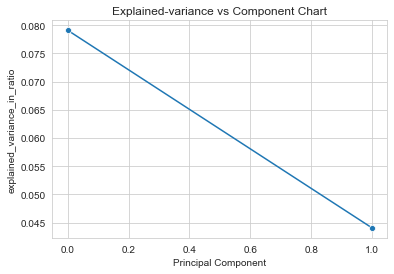

In [17]:
from sklearn.decomposition import PCA
import seaborn as sns
# use PCA to reduce high-dimension vectors to 2-dimension vectors as points in 2D plane
def dimension_reduction(X_tr):  
    X_tr_scaled = StandardScaler().fit_transform(X_tr)
    pca = PCA(n_components = 2)
    principalComponents = pca.fit_transform(X_tr_scaled)
    explained_variance_ratio = pca.explained_variance_ratio_
    
    #Plot the variance distribution among the principal components
    sns.set_style('whitegrid')
    ax = sns.lineplot(x=range(len(explained_variance_ratio)),y=explained_variance_ratio,marker='o')
    ax.set(xlabel='Principal Component',ylabel='explained_variance_in_ratio',title='Explained-variance vs Component Chart')
    return principalComponents

X_tr_redu = dimension_reduction(X_tr)


Because we choose our top-50 features to train our model, we need to use PCA to reduce our high-dimension vectors to 2-dimension vectors as points in 2D plane for surface boundary visualization. According to the explained ratio of Principal component in the above plot, we can see that Principal Component-0 explains around 7.9% of the data and Principal Component-1 explains around 4.4%. This means that they total explain 12.3% of the whole training dataset. Thus, we choose this two Principal Components to visualize our data properly in the 2-d plane with minimal loss of data.

[Text(0.5, 0, 'Principal Component - 0'),
 Text(0, 0.5, 'Principal Component - 1'),
 Text(0.5, 1.0, 'Principal_Component-0 vs Principal_Component-1')]

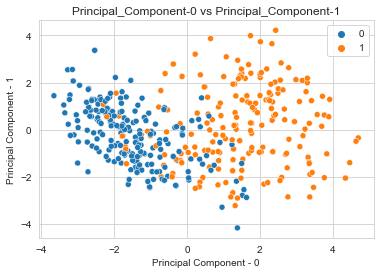

In [18]:
#Plotting
ax = sns.scatterplot(x=X_tr_redu[:,0],y=X_tr_redu[:,1],hue=y_tr)
ax.set(xlabel='Principal Component - 0',ylabel='Principal Component - 1',title='Principal_Component-0 vs Principal_Component-1')

### (i) the soft-margin linear SVM with your choice of misclassification penalty (𝐶)

Training accuracy(kernel=linear):0.8714953271028038
Test accuracy(kernel=linear):88.67924528301887%
               precision    recall  f1-score   support

         tech     0.9298    0.8689    0.8983        61
entertainment     0.8367    0.9111    0.8723        45

     accuracy                         0.8868       106
    macro avg     0.8833    0.8900    0.8853       106
 weighted avg     0.8903    0.8868    0.8873       106



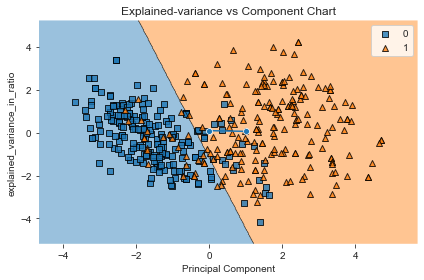

In [19]:
from sklearn.svm import SVC
# Fitting SVM to the Training set
svm_linear = SVC(C=10,kernel='linear')
svm_linear.fit(X_tr_redu,y_tr)
print("Training accuracy(kernel=linear):"+str(svm_linear.score(X_tr_redu,y_tr)))

#predict model accuracy
X_test_redu = dimension_reduction(X_test)
svm_linear_predicted = svm_linear.predict(X_test_redu)
print(f"Test accuracy(kernel=linear):{accuracy_score(y_test, svm_linear_predicted)*100}%")
print(classification_report(y_test, svm_linear_predicted,target_names=label, digits=4))
#print( "Support Vectors:\n", svm_linear.support_vectors_)

# Plotting decision regions
plot_decision_regions(X = X_tr_redu, y=y_tr, clf=svm_linear,legend=2)

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()   
plt.show()

When C is smaller, it allows more misclassification error in our model. When C is larger, it has lower tolerance to misclassification error. However, we get similar test accuracy around 89% no matter what the value of misclassification penalty (C) is in our soft-margin linear SVM model. Because the training data is non-linear,our soft-margin linear SVM model shows that the decision boundary does not separate 2 labels perfectly.

### (ii) the hard-margin RBF kernel with your choice of kernel width (σ)

Training accuracy(kernel=rbf):0.9112149532710281
Test accuracy(kernel=rbf):88.67924528301887%
               precision    recall  f1-score   support

         tech     0.9153    0.8852    0.9000        61
entertainment     0.8511    0.8889    0.8696        45

     accuracy                         0.8868       106
    macro avg     0.8832    0.8871    0.8848       106
 weighted avg     0.8880    0.8868    0.8871       106



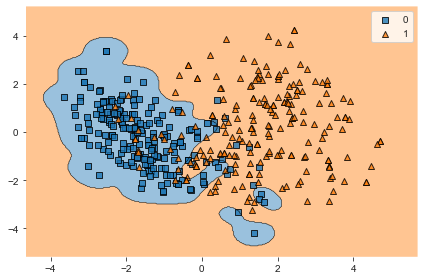

In [20]:
#hard-margin  RBF
# Fitting SVM to the Training set
svm_rbf = SVC(kernel='rbf', gamma = 5)
svm_rbf.fit(X_tr_redu,y_tr)
print("Training accuracy(kernel=rbf):"+str(svm_rbf.score(X_tr_redu,y_tr)))

#predict model accuracy
svm_rbf_predicted = svm_rbf.predict(X_test_redu)
print(f"Test accuracy(kernel=rbf):{accuracy_score(y_test, svm_rbf_predicted)*100}%")
print(classification_report(y_test, svm_rbf_predicted,target_names=label, digits=4))
#print( "Support Vectors:\n", svm_rbf.support_vectors_)


# Plotting decision regions
plot_decision_regions(X= X_tr_redu, y=y_tr, clf=svm_rbf, legend=2)

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()   
plt.show()

The kernel hyperparameter is gamma. When gamma is low(i.e. A larger value of kernel width(𝜎)),the decision boundary is very broad and lower curvature in our Hard-margin RBF kernel model. When gamma is high(i.e. A smaller value of kernel width(𝜎)), the decision boundary is higher curvature and highly effected by the variance, which creates islands of decision boundaries around data points. Thus, when gamma = 5, the decision boundary is only slightly effected by individual data points in the above plot which let our model provide a high test accuracy around 89%.

## (d) Neural Network classification models


● Train a single hidden layer neural network using the hyperparameters on the training
dataset, except for the number of hidden units (x) which should vary among 5, 20, and
40. Run the optimization for 100 epochs each time. Namely, the input layer consists of n
features x = [x1, ..., xn]T, the hidden layer has x nodes z = [z1, ..., zx]T, and the output
layer is a probability distribution y = [y1, y2]T over two classes.

● Plot the average training cross-entropy loss as shown below on the y-axis versus the
number of hidden units on the x-axis. Explain the effect of numbers of hidden units.
𝐶𝑟𝑜𝑠𝑠𝐸𝑛𝑡𝑟𝑜𝑝𝑦𝐿𝑜𝑠𝑠 

In [21]:
array9 = np.array(df.Text).tolist()
vectorizer2 = TfidfVectorizer()
vectorizer2.fit(array9)
data_x_y = vectorizer2.transform(array9)
data_x_y.shape[:]

(534, 14927)

In [22]:
from sklearn.neural_network import MLPClassifier

data_x = data_x_y.toarray()[:df.shape[0]]
data_y = df["Category"]
split = len(df_train)

train_x = data_x[:split]
train_y = data_y[:split]
test_x = data_x[split:]
test_y = data_y[split:]

layer1 = (5,)
layer2 = (20,)
layer3 = (40,)

acc = []
loss_acc = []

nn1 = MLPClassifier(hidden_layer_sizes = layer1,learning_rate_init = 0.01, max_iter = 100, random_state = 1)
nn1.fit(train_x, train_y)
predictions = nn1.predict(train_x)
acc.append(nn1.score(train_x, predictions))
loss_acc.append(sum(nn1.loss_curve_)/len(nn1.loss_curve_))

nn2 = MLPClassifier(hidden_layer_sizes = layer2,learning_rate_init = 0.01, max_iter = 100, random_state = 1)
nn2.fit(train_x, train_y)
predictions = nn2.predict(train_x)
acc.append(nn2.score(train_x, predictions))
loss_acc.append(sum(nn2.loss_curve_)/len(nn2.loss_curve_))

nn3 = MLPClassifier(hidden_layer_sizes = layer3,learning_rate_init = 0.01, max_iter = 100, random_state = 1)
nn3.fit(train_x, train_y)
predictions = nn3.predict(train_x)
acc.append(nn3.score(train_x, predictions))
loss_acc.append(sum(nn3.loss_curve_)/len(nn3.loss_curve_))


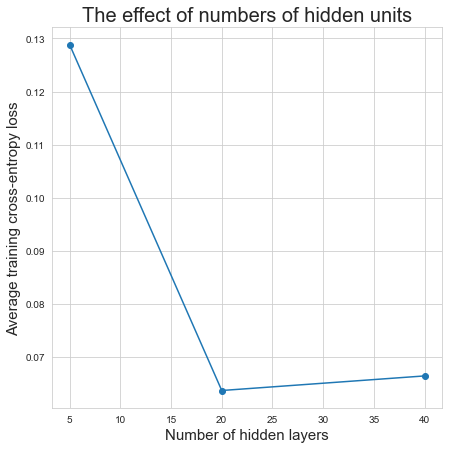

In [23]:
layers = [5,20,40]
av_loss = [loss_acc[0],loss_acc[1],loss_acc[2]]

plt.figure(figsize=(7, 7))
plt.plot(layers,av_loss)
plt.scatter(layers,av_loss)
plt.xlabel("Number of hidden layers",fontsize=15)
plt.ylabel("Average training cross-entropy loss",fontsize=15)
plt.title('The effect of numbers of hidden units',fontsize=20)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

If you have too few hidden units, you will get high training error and high generalization error due to underfitting and high statistical bias. If you have too many hidden units, you may get low training error but still have high generalization error due to overfitting and high variance.

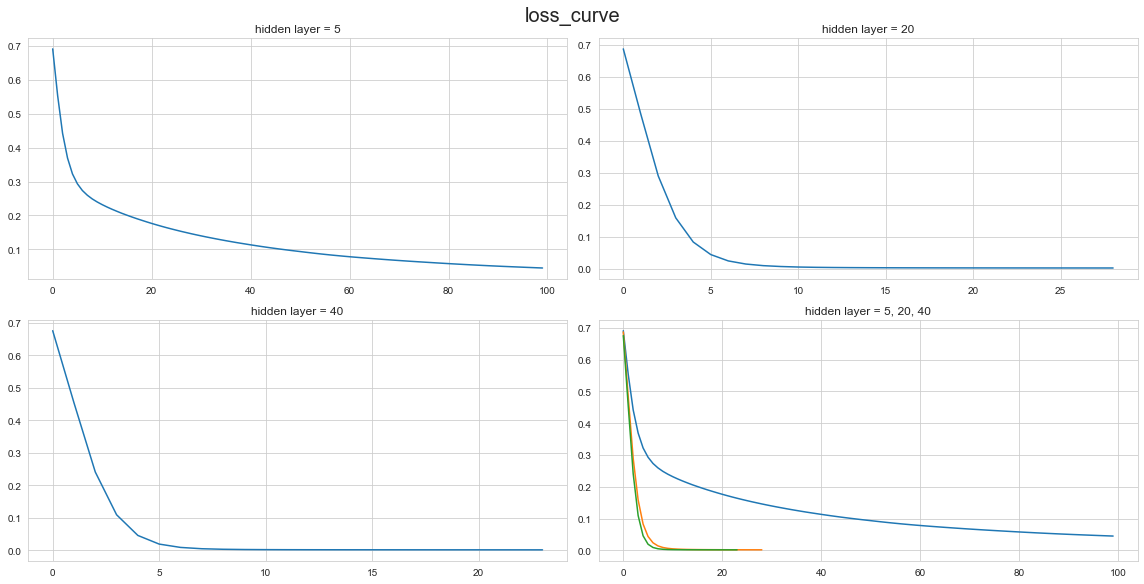

In [24]:
plt.figure(figsize=(16, 16))
plt.suptitle("loss_curve",size = 20)

plt.subplot(421)
plt.plot(nn1.loss_curve_)
plt.title("hidden layer = 5")

plt.subplot(422)
plt.plot(nn2.loss_curve_)
plt.title("hidden layer = 20")

plt.subplot(423)
plt.plot(nn3.loss_curve_)
plt.title("hidden layer = 40")

plt.subplot(424)
plt.plot(nn1.loss_curve_)
plt.plot(nn2.loss_curve_)
plt.plot(nn3.loss_curve_)
plt.title("hidden layer = 5, 20, 40")

plt.tight_layout()
plt.show()

# TASK3 Classification Quality Evaluation
## (a) Explore how the size of the training data set affects the test and train accuracy.

### For logistic regression classifier

In [25]:
from sklearn.metrics import f1_score

M = [0.1, 0.3, 0.5, 0.7, 0.9]
N = len(X_train1)

lg_training_accuracy = []
lg_testing_accuracy = []
for m in M:
    index = int(m*N)
    lg_classifier.fit(X_train1[:index], Y_train1[:index])
    train_predictions = lg_classifier.predict(X_train1[:index])
    test_predictions = lg_classifier.predict(X_test1)

    training_f1 = f1_score(Y_train1[:index], train_predictions)
    testing_f1 = f1_score(Y_test1, test_predictions)
    lg_training_accuracy.append(training_f1)
    lg_testing_accuracy.append(testing_f1)
    
    print(f"when m={m}")
    print(f"Training accuracy: {training_f1*100}%")
    print(f"Test accuracy: {testing_f1*100}%\n")
    

when m=0.1
Training accuracy: 100.0%
Test accuracy: 94.6236559139785%

when m=0.3
Training accuracy: 100.0%
Test accuracy: 97.77777777777777%

when m=0.5
Training accuracy: 100.0%
Test accuracy: 97.77777777777777%

when m=0.7
Training accuracy: 100.0%
Test accuracy: 98.9010989010989%

when m=0.9
Training accuracy: 100.0%
Test accuracy: 98.9010989010989%



### For Naive Bayes classifier

In [26]:
nb_training_accuracy = []
nb_testing_accuracy = []
for m in M:
    index = int(m*N)
    nb_classifier.fit(X_train2[:index], Y_train2[:index])
    train_predictions = nb_classifier.predict(X_train2[:index])
    test_predictions = nb_classifier.predict(X_test2)

    training_f1 = f1_score(Y_train2[:index], train_predictions)
    testing_f1 = f1_score(Y_test2, test_predictions)
    nb_training_accuracy.append(training_f1)
    nb_testing_accuracy.append(testing_f1)
    
    print(f"when m={m}")
    print(f"Training accuracy: {training_f1*100}%")
    print(f"Test accuracy: {testing_f1*100}%\n")
    

when m=0.1
Training accuracy: 100.0%
Test accuracy: 60.40268456375839%

when m=0.3
Training accuracy: 99.1869918699187%
Test accuracy: 97.82608695652173%

when m=0.5
Training accuracy: 99.5433789954338%
Test accuracy: 95.74468085106383%

when m=0.7
Training accuracy: 99.67845659163987%
Test accuracy: 95.74468085106383%

when m=0.9
Training accuracy: 99.48186528497409%
Test accuracy: 96.7741935483871%



### For SVM classification models

In [27]:
svm_training_accuracy = []
svm_testing_accuracy = []

for m in M:
    index = int(m*N)
    svm_linear.fit(X_tr[:index],y_tr[:index])
    linear_tr_predicted = svm_linear.predict(X_tr[:index])
    linear_test_predicted = svm_linear.predict(X_test)
    
    tr_f1 = f1_score(y_tr[:index], linear_tr_predicted)
    test_f1 = f1_score(y_test, linear_test_predicted)
    svm_training_accuracy.append(tr_f1)
    svm_testing_accuracy.append(test_f1)
    
    print(f"when m={m}")
    print(f"Training accuracy: {tr_f1*100}%")
    print(f"Test accuracy: {test_f1*100}%\n")
    

when m=0.1
Training accuracy: 100.0%
Test accuracy: 94.38202247191012%

when m=0.3
Training accuracy: 100.0%
Test accuracy: 92.3076923076923%

when m=0.5
Training accuracy: 99.5433789954338%
Test accuracy: 96.7741935483871%

when m=0.7
Training accuracy: 99.35483870967742%
Test accuracy: 96.7032967032967%

when m=0.9
Training accuracy: 99.22077922077924%
Test accuracy: 96.7032967032967%



### For neural network classification models

#### We only use hidden layer (20,) , this is because the average entropy loss is minimum in three hidden layers.

In [28]:
data_x = data_x_y.toarray()[:df.shape[0]]
data_y = df["Category"]
split = len(df_train)

train_x = data_x[:split]
train_y = data_y[:split]
test_x = data_x[split:]
test_y = data_y[split:]

layer = (20,)

nn_training_accuracy = []
nn_testing_accuracy = []

for m in M:
    index = int(m*N)
    nn = MLPClassifier(hidden_layer_sizes = layer,learning_rate_init = 0.01, max_iter = 100, random_state = 1)
    nn.fit(train_x[: index], train_y[: index])
    predict_train_y1 = nn.predict(train_x[: index])
    predict_test_y1 = nn.predict(test_x)
    f1_train = f1_score(train_y[: index], predict_train_y1,pos_label='tech')
    f1_test = f1_score(test_y, predict_test_y1,pos_label='tech')
    nn_training_accuracy.append(f1_train)
    nn_testing_accuracy.append(f1_test)
    
    print(f"when m={m}")
    print(f"Training accuracy: {f1_train*100}%")
    print(f"Test accuracy: {f1_test*100}%\n")

when m=0.1
Training accuracy: 100.0%
Test accuracy: 94.73684210526316%

when m=0.3
Training accuracy: 100.0%
Test accuracy: 97.77777777777777%

when m=0.5
Training accuracy: 100.0%
Test accuracy: 97.77777777777777%

when m=0.7
Training accuracy: 100.0%
Test accuracy: 96.7741935483871%

when m=0.9
Training accuracy: 100.0%
Test accuracy: 98.9010989010989%



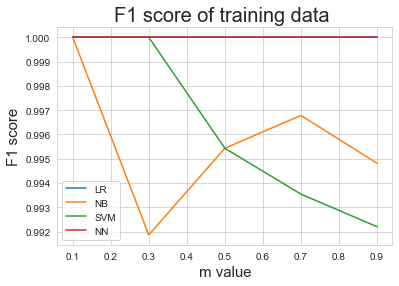

In [29]:
#training dataset F1 plot
fig, ax = plt.subplots()
x = np.linspace(0.1,0.9,5)

ax.plot(x, lg_training_accuracy, label = "LR")
ax.plot(x, nb_training_accuracy, label = "NB")
ax.plot(x, svm_training_accuracy, label = "SVM")
ax.plot(x, nn_training_accuracy, label = "NN")

plt.xlabel("m value",fontsize=15)
plt.ylabel("F1 score",fontsize=15)
plt.title('F1 score of training data ',fontsize=20)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.legend()
plt.show()


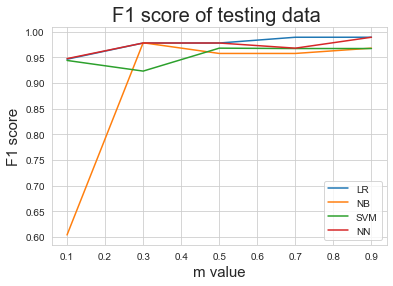

In [30]:
#testing dataset F1 plot
fig, ax = plt.subplots()
x = np.linspace(0.1,0.9,5)

ax.plot(x, lg_testing_accuracy, label = "LR")
ax.plot(x, nb_testing_accuracy, label = "NB")
ax.plot(x, svm_testing_accuracy, label = "SVM")
ax.plot(x, nn_testing_accuracy, label = "NN")

plt.xlabel("m value",fontsize=15)
plt.ylabel("F1 score",fontsize=15)
plt.title('F1 score of testing data ',fontsize=20)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.legend()
plt.show()

#### Explain the general trend of the two plots in terms of training and testing accuracy

The size of the training dataset affects both training and testing accuracy. The higher the proportion of training dataset
used to fit the model, the better the performance achieves.

In general, 4 learners show a high training accuracy above 99.2% with different size of the training data sets fitted, but
testing accuracy varies respectively.

No matter how many training data are used to fit LR and NN classifiers, both models have a steady high training accuracy score of 100%. For SVM classifier, initially the model shows a high training accuracy with F1 score of 100%. As a larger portion of training data fits, the training accuracy decreases dramatically. Generally, LR, NN, and SVM classifiers also have a steady high testing accuracy score between 93% and 99%, no matter how many training data are used to fit these models. 

For NB classifier, both training and testing accuracy fluctuates as the proportion of training data fitted changes. Fitting the model on the first 10% training data yields a highest training accuracy of 100%, whereas the testing accuracy hits to a valley about only 60%. It appears a potential overfitting issue. When the first 30% training data fits on NB model, the testing accuracy peaks at about 98%, whereas the training accuracy hits to a its lowest point about 99.2%. This indicates a potential underfitting issue. Then the training accuracy trend grows a bit, until the first 70% training data are used, the training accuracy starts decreasing again. Correspondingly, the testing accuracy stays unchanged between 95% and 97%. 

In summary, both LR and NN models outperform NB and SVM models. 

## (b) use 5-fold cross-validation to assess model performance

### Logistic Regression Classifier

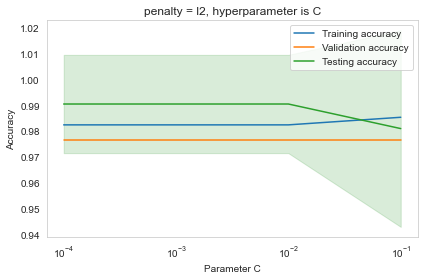

In [31]:
from sklearn.model_selection import cross_val_score
index = int(len(X_train1)*0.8)
lg_X_train = X_train1[:index]
lg_Y_train = Y_train1[:index]
lg_X_val = X_train1[index:]
lg_Y_val = Y_train1[index:]

# Investigate hyperparameters is C, C = [10000, 1000, 100, 10]
lg_hyperparameter = ["penalty='l2', C=10000",
                     "penalty='l2', C=1000",
                     "penalty='l2', C=100",
                     "penalty='l2', C=10"]
lg1 = LogisticRegression(penalty="l2", C = 10000)
lg2 = LogisticRegression(penalty="l2", C = 1000)
lg3 = LogisticRegression(penalty="l2", C = 100)
lg4 = LogisticRegression(penalty="l2", C = 10)
lg_models = [lg1, lg2, lg3, lg4]

lg_TrAcc  = []
lg_ValidAcc= []
lg_TestAcc = []
for i in range(len(lg_models)):
    TrAcc = cross_val_score(lg_models[i], lg_X_train, lg_Y_train, cv=5)
    lg_TrAcc.append(TrAcc)
    
    ValidAcc = cross_val_score(lg_models[i], lg_X_val, lg_Y_val, cv=5)
    lg_ValidAcc.append(ValidAcc)
    
    TestAcc = cross_val_score(lg_models[i], X_test1, Y_test1, cv=5)
    lg_TestAcc.append(TestAcc)

lg_train_mean = np.mean(lg_TrAcc, axis=1)
lg_train_std = np.std(lg_TrAcc, axis=1)
lg_val_mean = np.mean(lg_ValidAcc, axis=1)
lg_val_std = np.std(lg_ValidAcc, axis=1)
lg_test_mean = np.mean(lg_TestAcc, axis=1)
lg_test_std = np.std(lg_TestAcc, axis=1)


fig, ax = plt.subplots()

x = np.array([1/10000, 1/1000, 1/100, 1/10])
ax.plot(x, lg_train_mean, label = "Training accuracy")
ax.plot(x, lg_val_mean, label = "Validation accuracy")
ax.plot(x, lg_test_mean, label = "Testing accuracy")

plt.fill_between(x, 
                 lg_test_mean + lg_test_std,
                 lg_test_mean - lg_test_std,
                 alpha = 0.15, color = "green")

plt.title("penalty = l2, hyperparameter is C")
plt.grid()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend()
plt.show()


#### The best hyperparameter of LR

In general, after applying L2 regularization, the classification accuracy remains at high score between about 97.5% and 99%.

As the regularization term λ increases, this classifier appears poor generalisation performance and has overfitting issue. It fits the training data so well with high training accuracy, so bias is low. But results change a lot if test set is applied, then test accuracy is low, so variance is high. Vailidation accuracy remains unchanged with different λ applied. 

Based on the overall evaluation, λ = 0.001 is chosen to further explore the optimal models across different classifiers.

### Naive Bayes classifier

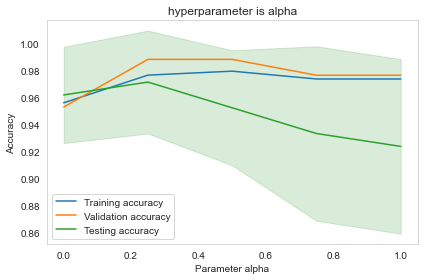

In [32]:
index = int(len(X_train2)*0.8)
nb_X_train = X_train2[:index]
nb_Y_train = Y_train2[:index]
nb_X_val = X_train2[index:]
nb_Y_val = Y_train2[index:]

# Investigate hyperparameters: alpha. alpha = [0, 0.25, 0.5, 0.75, 1]
nb_hyperparameter = ["alpha = 0",
                     "alpha = 0.25",
                     "alpha = 0.5",
                     "alpha = 0.75",
                     "alpha = 1"]
nb1 = MultinomialNB(alpha = 0)
nb2 = MultinomialNB(alpha = 0.25)
nb3 = MultinomialNB(alpha = 0.5)
nb4 = MultinomialNB(alpha = 0.75)
nb5 = MultinomialNB(alpha = 1)

nb_models = [nb1, nb2, nb3, nb4, nb5]

nb_TrAcc  = []
nb_ValidAcc= []
nb_TestAcc = []
for i in range(len(nb_models)):
    TrAcc = cross_val_score(nb_models[i], nb_X_train, nb_Y_train, cv=5)
    nb_TrAcc.append(TrAcc)
    
    ValidAcc = cross_val_score(nb_models[i], nb_X_val, nb_Y_val, cv=5)
    nb_ValidAcc.append(ValidAcc)
    
    TestAcc = cross_val_score(nb_models[i], X_test2, Y_test2, cv=5)
    nb_TestAcc.append(TestAcc)

nb_train_mean = np.mean(nb_TrAcc, axis=1)
nb_train_std = np.std(nb_TrAcc, axis=1)
nb_val_mean = np.mean(nb_ValidAcc, axis=1)
nb_val_std = np.std(nb_ValidAcc, axis=1)
nb_test_mean = np.mean(nb_TestAcc, axis=1)
nb_test_std = np.std(nb_TestAcc, axis=1)


fig, ax = plt.subplots()

x = np.array([0, 0.25, 0.5, 0.75, 1])
ax.plot(x, nb_train_mean, label = "Training accuracy")
ax.plot(x, nb_val_mean, label = "Validation accuracy")
ax.plot(x, nb_test_mean, label = "Testing accuracy")

plt.fill_between(x, 
                 nb_test_mean + nb_test_std,
                 nb_test_mean - nb_test_std,
                 alpha = 0.15, color = "green")

plt.title("hyperparameter is alpha")
plt.grid()
plt.xlabel('Parameter alpha')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend()
plt.show()
    

#### The best hyperparameter of NB

When alpha = 0, it indicates that no smoothing applied on this model. The classification accuracy achieves at a reasonable point around 95%. The higher the alpha value applies, the testing accuracy decreases and both traning and validation accuracy remains high. It shows an overfitting issue.

Alpha = 0.25 is chosen as an optimal hyperparameter to balance bias and variance  to achieve a best model. 

#### SVM classification models

#### When kernel = linear, hyperparameter is C, and demonstrate the hyperparameters impact on the testing accuracy¶

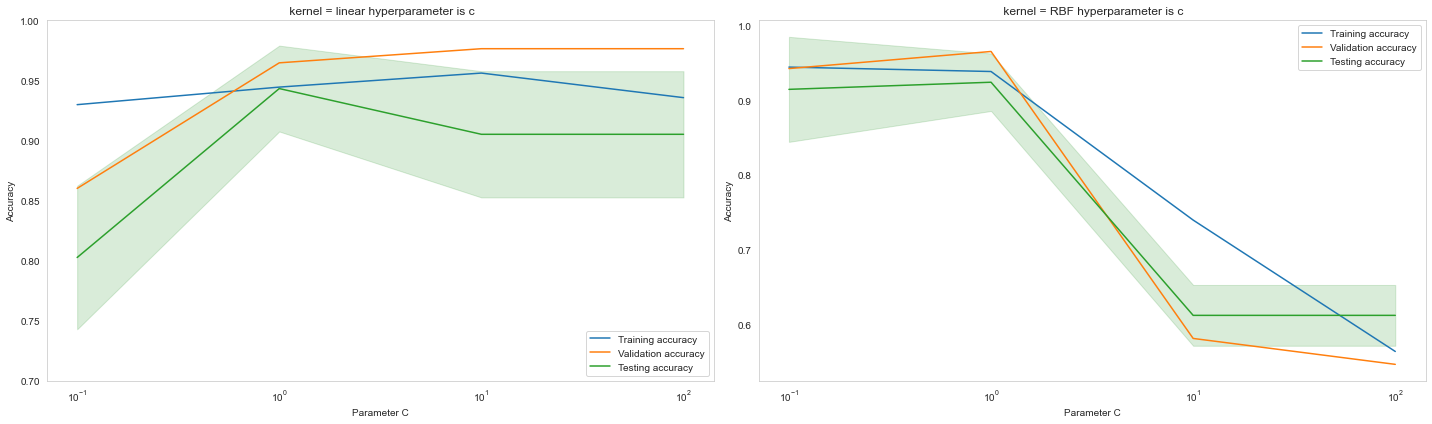

In [33]:
from sklearn.model_selection import cross_val_score
index = int(len(X_tr)*0.8)
svm_X_tr = X_tr[:index]
svm_y_tr = y_tr[:index]
svm_val_x = X_tr[index:]
svm_val_y = y_tr[index:]

svm_linear_hyperparameter = ["kernel='linear',C=0.1",
                             "kernel='linear',C=1",
                             "kernel='linear',C=10",
                             "kernel='linear',C=100"]

svm1 = SVC(kernel='linear',C=0.1)
svm2 = SVC(kernel='linear',C=1)
svm3 = SVC(kernel='linear',C=10)
svm4 = SVC(kernel='linear',C=100)
svm_models = [svm1, svm2, svm3, svm4]


svm_linear_TrAcc  = []
svm_linear_ValidAcc= []
svm_linear_TestAcc = []
for i in range(len(svm_models)):
    TrAcc = cross_val_score(svm_models[i], svm_X_tr, svm_y_tr, cv=5)
    svm_linear_TrAcc.append(TrAcc)
    
    ValidAcc = cross_val_score(svm_models[i], svm_val_x, svm_val_y, cv=5)
    svm_linear_ValidAcc.append(ValidAcc)
    
    TestAcc = cross_val_score(svm_models[i], X_test, y_test, cv=5)
    svm_linear_TestAcc.append(TestAcc)
   
    

svm_linear_train_mean = np.mean(svm_linear_TrAcc, axis=1)
svm_linear_train_std = np.std(svm_linear_TrAcc, axis=1)
svm_linear_val_mean = np.mean(svm_linear_ValidAcc, axis=1)
svm_linear_val_std = np.std(svm_linear_ValidAcc, axis=1)
svm_linear_test_mean = np.mean(svm_linear_TestAcc, axis=1)
svm_linear_test_std = np.std(svm_linear_TestAcc, axis=1)
                             
svm_linear_hyperparameter = ["kernel='rbf', gamma = 0.1",
                             "kernel='rbf', gamma = 1",
                             "kernel='rbf', gamma = 10",
                             "kernel='rbf', gamma = 100"]

svm5 = SVC(kernel='rbf', gamma = 0.1)
svm6 = SVC(kernel='rbf', gamma = 1)
svm7 = SVC(kernel='rbf', gamma = 10)
svm8 = SVC(kernel='rbf', gamma = 100)
svm_models = [svm5, svm6, svm7, svm8]


svm_rbf_TrAcc  = []
svm_rbf_ValidAcc= []
svm_rbf_TestAcc = []
for i in range(len(svm_models)):
    TrAcc = cross_val_score(svm_models[i], svm_X_tr, svm_y_tr, cv=5)
    svm_rbf_TrAcc.append(TrAcc)
    
    ValidAcc = cross_val_score(svm_models[i], svm_val_x, svm_val_y, cv=5)
    svm_rbf_ValidAcc.append(ValidAcc)
    
    TestAcc = cross_val_score(svm_models[i], X_test, y_test, cv=5)
    svm_rbf_TestAcc.append(TestAcc)

svm_rbf_train_mean = np.mean(svm_rbf_TrAcc, axis=1)
svm_rbf_train_std = np.std(svm_rbf_TrAcc, axis=1)
svm_rbf_val_mean = np.mean(svm_rbf_ValidAcc, axis=1)
svm_rbf_val_std = np.std(svm_rbf_ValidAcc, axis=1)
svm_rbf_test_mean = np.mean(svm_rbf_TestAcc, axis=1)
svm_rbf_test_std = np.std(svm_rbf_TestAcc, axis=1)

plt.figure(figsize = (20, 6)) 
plt.subplot(121)
ax = plt.gca()

x = np.array([0.1, 1, 10, 100])
ax.plot(x, svm_linear_train_mean, label = "Training accuracy")
ax.plot(x, svm_linear_val_mean, label = "Validation accuracy")
ax.plot(x, svm_linear_test_mean, label = "Testing accuracy")

plt.fill_between(x, 
                 svm_linear_test_mean + svm_linear_test_std,
                 svm_linear_test_mean - svm_linear_test_std,
                 alpha = 0.15, color = "green")
plt.title(" kernel = linear hyperparameter is c")
plt.grid()
plt.legend()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1.0])
plt.tight_layout()

plt.subplot(122)
ax = plt.gca()

x = np.array([0.1, 1, 10, 100])
ax.plot(x, svm_rbf_train_mean, label = "Training accuracy")
ax.plot(x, svm_rbf_val_mean, label = "Validation accuracy")
ax.plot(x, svm_rbf_test_mean, label = "Testing accuracy")

plt.fill_between(x, 
                 svm_rbf_test_mean + svm_rbf_test_std,
                 svm_rbf_test_mean - svm_rbf_test_std,
                 alpha = 0.15, color = "green")
plt.title(" kernel = RBF hyperparameter is c")
plt.grid()
plt.legend()
plt.xscale('log')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

#### The best hyperparameter of SVM

When kernel is linear with C=1, the model has a higher validation accuracy with equal testing and training accuracy. When c = 0.1, c = 10 or c = 100, the model shows overfitting issue.

When kernel is RBF with c = 1, the model appears a higher validation accuracy with similar testing and training accuracy. Whereas c = 0.1, slightly overfitting exits in the model. When c= 10 or c = 100, the model is slightly underfitting. 

RBF kernel with c = 0.1 is chosen as our optimal model to compare with other different classifiers according to the training and validation loss that decreases to a point. 

### Neural Network classification models

#### For layer = 5

In [34]:
layer = (5,)
index = int(len(train_x)*0.8)
nn_X_tr = train_x[:index]
nn_y_tr = train_y[:index]
nn_val_x = train_x[index:]
nn_val_y = train_y[index:]

nn_hyperparameter = ["learning_rate_init = 0.001,alpha=0.0001",
                    "learning_rate_init = 0.001,alpha=0.0005",
                    "learning_rate_init = 0.001,alpha=0.001",
                    "learning_rate_init = 0.01,alpha=0.0001",
                    "learning_rate_init = 0.01,alpha=0.0005",
                    "learning_rate_init = 0.01,alpha=0.001"]

nn1 = MLPClassifier(hidden_layer_sizes = layer, max_iter = 100, random_state = 1,learning_rate_init = 0.001,alpha=0.0001)
nn2 = MLPClassifier(hidden_layer_sizes = layer, max_iter = 100, random_state = 1,learning_rate_init = 0.001,alpha=0.0005)
nn3 = MLPClassifier(hidden_layer_sizes = layer, max_iter = 100, random_state = 1,learning_rate_init = 0.001,alpha=0.001)
nn4 = MLPClassifier(hidden_layer_sizes = layer, max_iter = 100, random_state = 1,learning_rate_init = 0.01,alpha=0.0001)
nn5 = MLPClassifier(hidden_layer_sizes = layer, max_iter = 100, random_state = 1,learning_rate_init = 0.01,alpha=0.0005)
nn6 = MLPClassifier(hidden_layer_sizes = layer, max_iter = 100, random_state = 1,learning_rate_init = 0.01,alpha=0.001)

#nn_models = [nn1, nn2, nn3, nn4, nn5, nn6]
nn_models1 = [nn1, nn2, nn3]
nn_models2 = [nn4, nn5, nn6]

nn_TrAcc1  = []
nn_ValidAcc1 = []
nn_TestAcc1 = []
for i in range(len(nn_models1)):
    TrAcc = cross_val_score(nn_models1[i], nn_X_tr, nn_y_tr, cv=5)
    nn_TrAcc1.append(TrAcc)
    
    ValidAcc = cross_val_score(nn_models1[i], nn_val_x, nn_val_y, cv=5)
    nn_ValidAcc1.append(ValidAcc)
    
    TestAcc = cross_val_score(nn_models1[i], test_x, test_y, cv=5)
    nn_TestAcc1.append(TestAcc)

nn_train_mean1 = np.mean(nn_TrAcc1, axis=1)
nn_train_std1 = np.std(nn_TrAcc1, axis=1)
nn_val_mean1 = np.mean(nn_ValidAcc1, axis=1)
nn_val_std1 = np.std(nn_ValidAcc1, axis=1)
nn_test_mean1 = np.mean(nn_TestAcc1, axis=1)
nn_test_std1 = np.std(nn_TestAcc1, axis=1)

nn_TrAcc2  = []
nn_ValidAcc2 = []
nn_TestAcc2 = []
for i in range(len(nn_models2)):
    TrAcc = cross_val_score(nn_models2[i], nn_X_tr, nn_y_tr, cv=5)
    nn_TrAcc2.append(TrAcc)
    
    ValidAcc = cross_val_score(nn_models2[i], nn_val_x, nn_val_y, cv=5)
    nn_ValidAcc2.append(ValidAcc)
    
    TestAcc = cross_val_score(nn_models2[i], test_x, test_y, cv=5)
    nn_TestAcc2.append(TestAcc)

nn_train_mean2 = np.mean(nn_TrAcc2, axis=1)
nn_train_std2 = np.std(nn_TrAcc2, axis=1)
nn_val_mean2 = np.mean(nn_ValidAcc2, axis=1)
nn_val_std2 = np.std(nn_ValidAcc2, axis=1)
nn_test_mean2 = np.mean(nn_TestAcc2, axis=1)
nn_test_std2 = np.std(nn_TestAcc2, axis=1)

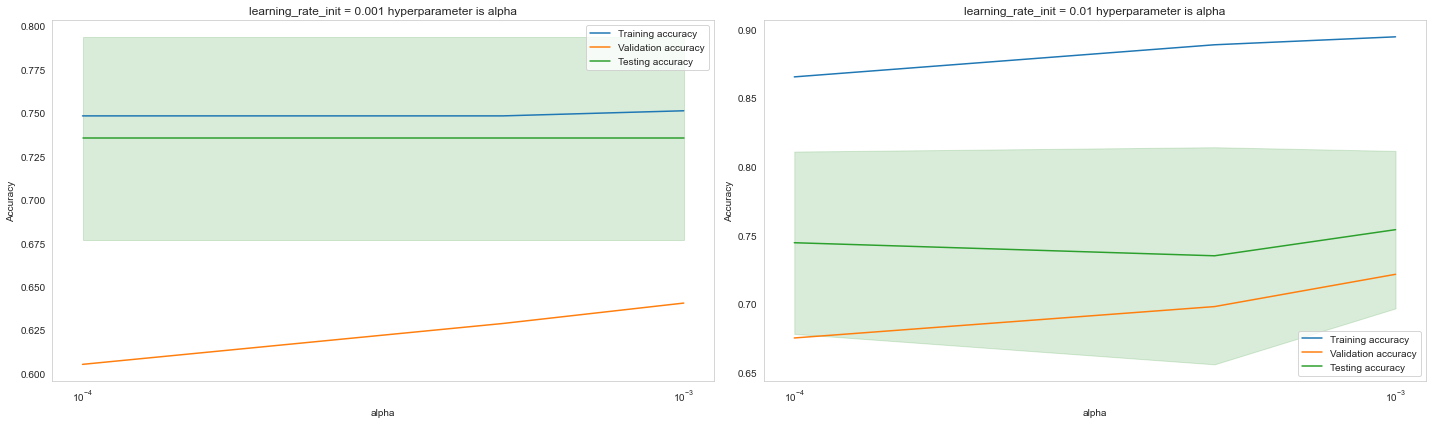

In [35]:
plt.figure(figsize = (20, 6)) 
plt.subplot(121)
ax = plt.gca()

x = np.array([0.0001, 0.0005, 0.001])
ax.plot(x, nn_train_mean1, label = "Training accuracy")
ax.plot(x, nn_val_mean1, label = "Validation accuracy")
ax.plot(x, nn_test_mean1, label = "Testing accuracy")

plt.fill_between(x, 
                 nn_test_mean1 + nn_test_std1,
                 nn_test_mean1 - nn_test_std1,
                 alpha = 0.15, color = "green")
plt.title("learning_rate_init = 0.001 hyperparameter is alpha")
plt.grid()
plt.legend()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.tight_layout()

plt.subplot(122)
ax = plt.gca()
x = np.array([0.0001, 0.0005, 0.001])
ax.plot(x, nn_train_mean2, label = "Training accuracy")
ax.plot(x, nn_val_mean2, label = "Validation accuracy")
ax.plot(x, nn_test_mean2, label = "Testing accuracy")

plt.fill_between(x, 
                 nn_test_mean2 + nn_test_std2,
                 nn_test_mean2 - nn_test_std2,
                 alpha = 0.15, color = "green")
plt.title("learning_rate_init = 0.01 hyperparameter is alpha")
plt.grid()
plt.legend()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

NN classifier with layer 5 shows underfitting issue. With different alpha, both the traning accuracy and the testing accuracy have low accuracy.

#### For layer = 20

In [36]:
layer = (20,)
index = int(len(train_x)*0.8)
nn_X_tr = train_x[:index]
nn_y_tr = train_y[:index]
nn_val_x = train_x[index:]
nn_val_y = train_y[index:]

nn_hyperparameter = ["learning_rate_init = 0.001,alpha=0.0001",
                    "learning_rate_init = 0.001,alpha=0.0005",
                    "learning_rate_init = 0.001,alpha=0.001",
                    "learning_rate_init = 0.01,alpha=0.0001",
                    "learning_rate_init = 0.01,alpha=0.0005",
                    "learning_rate_init = 0.01,alpha=0.001"]

nn1 = MLPClassifier(hidden_layer_sizes = layer, max_iter = 100, random_state = 1,learning_rate_init = 0.001,alpha=0.0001)
nn2 = MLPClassifier(hidden_layer_sizes = layer, max_iter = 100, random_state = 1,learning_rate_init = 0.001,alpha=0.0005)
nn3 = MLPClassifier(hidden_layer_sizes = layer, max_iter = 100, random_state = 1,learning_rate_init = 0.001,alpha=0.001)
nn4 = MLPClassifier(hidden_layer_sizes = layer, max_iter = 100, random_state = 1,learning_rate_init = 0.01,alpha=0.0001)
nn5 = MLPClassifier(hidden_layer_sizes = layer, max_iter = 100, random_state = 1,learning_rate_init = 0.01,alpha=0.0005)
nn6 = MLPClassifier(hidden_layer_sizes = layer, max_iter = 100, random_state = 1,learning_rate_init = 0.01,alpha=0.001)

#nn_models = [nn1, nn2, nn3, nn4, nn5, nn6]
nn_models1 = [nn1, nn2, nn3]
nn_models2 = [nn4, nn5, nn6]

nn_TrAcc1  = []
nn_ValidAcc1 = []
nn_TestAcc1 = []
for i in range(len(nn_models1)):
    TrAcc = cross_val_score(nn_models1[i], nn_X_tr, nn_y_tr, cv=5)
    nn_TrAcc1.append(TrAcc)
    
    ValidAcc = cross_val_score(nn_models1[i], nn_val_x, nn_val_y, cv=5)
    nn_ValidAcc1.append(ValidAcc)
    
    TestAcc = cross_val_score(nn_models1[i], test_x, test_y, cv=5)
    nn_TestAcc1.append(TestAcc)

nn_train_mean1 = np.mean(nn_TrAcc1, axis=1)
nn_train_std1 = np.std(nn_TrAcc1, axis=1)
nn_val_mean1 = np.mean(nn_ValidAcc1, axis=1)
nn_val_std1 = np.std(nn_ValidAcc1, axis=1)
nn_test_mean1 = np.mean(nn_TestAcc1, axis=1)
nn_test_std1 = np.std(nn_TestAcc1, axis=1)

nn_TrAcc2  = []
nn_ValidAcc2 = []
nn_TestAcc2 = []
for i in range(len(nn_models2)):
    TrAcc = cross_val_score(nn_models2[i], nn_X_tr, nn_y_tr, cv=5)
    nn_TrAcc2.append(TrAcc)
    
    ValidAcc = cross_val_score(nn_models2[i], nn_val_x, nn_val_y, cv=5)
    nn_ValidAcc2.append(ValidAcc)
    
    TestAcc = cross_val_score(nn_models2[i], test_x, test_y, cv=5)
    nn_TestAcc2.append(TestAcc)
   
    
nn_train_mean2 = np.mean(nn_TrAcc2, axis=1)
nn_train_std2 = np.std(nn_TrAcc2, axis=1)
nn_val_mean2 = np.mean(nn_ValidAcc2, axis=1)
nn_val_std2 = np.std(nn_ValidAcc2, axis=1)
nn_test_mean2 = np.mean(nn_TestAcc2, axis=1)
nn_test_std2 = np.std(nn_TestAcc2, axis=1)

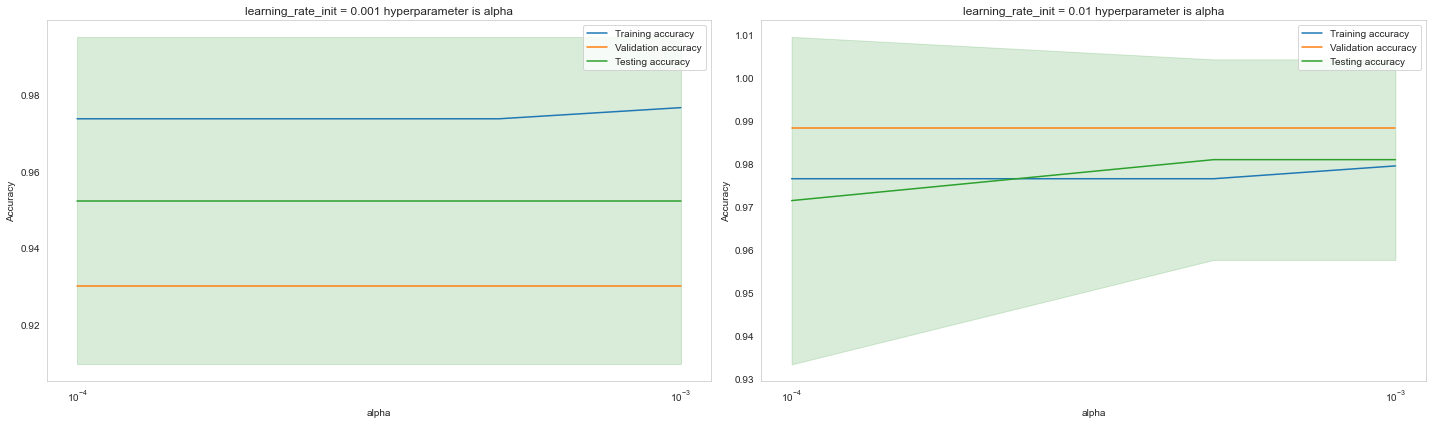

In [37]:
plt.figure(figsize = (20, 6)) 
plt.subplot(121)
ax = plt.gca()

x = np.array([0.0001, 0.0005, 0.001])
ax.plot(x, nn_train_mean1, label = "Training accuracy")
ax.plot(x, nn_val_mean1, label = "Validation accuracy")
ax.plot(x, nn_test_mean1, label = "Testing accuracy")

plt.fill_between(x, 
                 nn_test_mean1 + nn_test_std1,
                 nn_test_mean1 - nn_test_std1,
                 alpha = 0.15, color = "green")
plt.title("learning_rate_init = 0.001 hyperparameter is alpha")
plt.grid()
plt.legend()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.tight_layout()

plt.subplot(122)
ax = plt.gca()
x = np.array([0.0001, 0.0005, 0.001])
ax.plot(x, nn_train_mean2, label = "Training accuracy")
ax.plot(x, nn_val_mean2, label = "Validation accuracy")
ax.plot(x, nn_test_mean2, label = "Testing accuracy")

plt.fill_between(x, 
                 nn_test_mean2 + nn_test_std2,
                 nn_test_mean2 - nn_test_std2,
                 alpha = 0.15, color = "green")
plt.title("learning_rate_init = 0.01 hyperparameter is alpha")
plt.grid()
plt.legend()
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In hidden layer 20 NN models, the overall accuracy are higher than hidden layer 5. Compare the learning rate init = 0.001 and learning rate init = 0.01, the learning rate init = 0.01 model have higher and more stable accuracy. With different alpha, the gap between training accuracy and test accuracy is minimum in around alpha = 0.0005. By summary, the hidden layer 20, learning rate init = 0.01 and alpha = 0.0005 is the best hyperparameter setting in NN model.

### (c) Report and compare LR, NB, SVM, and NN classifiers with the best hyperparameter settings

In [40]:
# pick the Logistic Regression model with best hyperparameter: penalty="l2", C = 1000
lg_classifier = LogisticRegression(penalty="l2", C = 1000)
lg_classifier.fit(X_train1, Y_train1)
lg_test_predictions = lg_classifier.predict(X_test1)
print("F1 score for the Logistic Regression model:", f1_score(Y_test1, lg_test_predictions))

# pick the Naive Bayes model with best hyperparameter: alpha = 0.25
nb_classifier = MultinomialNB(alpha = 0.25)
nb_classifier.fit(X_train2, Y_train2)
nb_test_predictions = nb_classifier.predict(X_test2)
print("F1 score for the Naive Bayes model:", f1_score(Y_test2, nb_test_predictions))

# pick the SVM classification model with best hyperparameter: kernel='linear',C=1
svm = SVC(kernel='rbf',C=0.1)   
svm.fit(X_tr,y_tr)
svm_test_predictions = svm.predict(X_test)
print("F1 score for the SVM model:", f1_score(y_test, svm_test_predictions))

# pick the Neural Network model with best hyperparameter: layer = 20, , alpha = 0.0005, learning_rate_init = 0.01
nn = MLPClassifier(hidden_layer_sizes = (20,),learning_rate_init = 0.01, alpha = 0.0005, max_iter = 100, random_state = 1)
nn.fit(train_x, train_y)
nn_test_predictions = nn.predict(test_x)
print("F1 score for the Neural Network model:", f1_score(test_y, nn_test_predictions, pos_label='tech'))

F1 score for the Logistic Regression model: 0.989010989010989
F1 score for the Naive Bayes model: 0.967741935483871
F1 score for the SVM model: 0.9130434782608695
F1 score for the Neural Network model: 0.9782608695652174


#### Summary

After applying multiple hyperparameters to train 4 different classifiers to manage overfitting or underfitting issues. Best hyperparameters are extracted to fit our learners accordingly.

LR with λ = 0.001, NB with alpha = 0.25, SVM with kernel='rbf'and C=0.1, and NN with 20 hidden layers, alpha = 0.0005, learning_rate_init = 0.01 are the chosen best models with their optimal hyperparameters respectively.

All the selected 4 models have relatively high F1 testing accuracy above 95.6%. 

Amongst all 4 classifiers, LR have the highest testing F1 score about 98.9%, following by a moderate high testing F1 score of 97.8% on NN model and 96.8% on NB model. Then SVM model has a relatively low testing accuracy score about 95.6%.

To sum up, LR and NN classifiers outperform SVM and NB classifiers. Both LR and NN classifier fit the training data well, so training accuracy is high. Also they fit the testing data well, so testing accuracy is also high. 
